In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, mean_squared_error, classification_report, f1_score, make_scorer

from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.drop('id', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [6]:
df.gender.value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [7]:
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

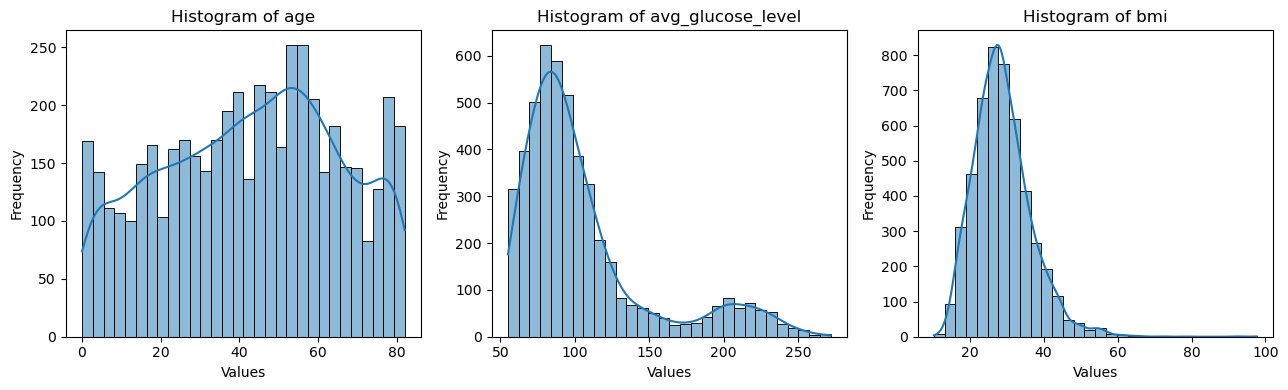

In [8]:
visu = df[['age', 'avg_glucose_level', 'bmi']]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

for i, column in enumerate(visu.columns):
    sns.histplot(visu[column], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Grafikleri sıkılaştırın ve gösterin
plt.tight_layout()
plt.show()

In [9]:
df.stroke.value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

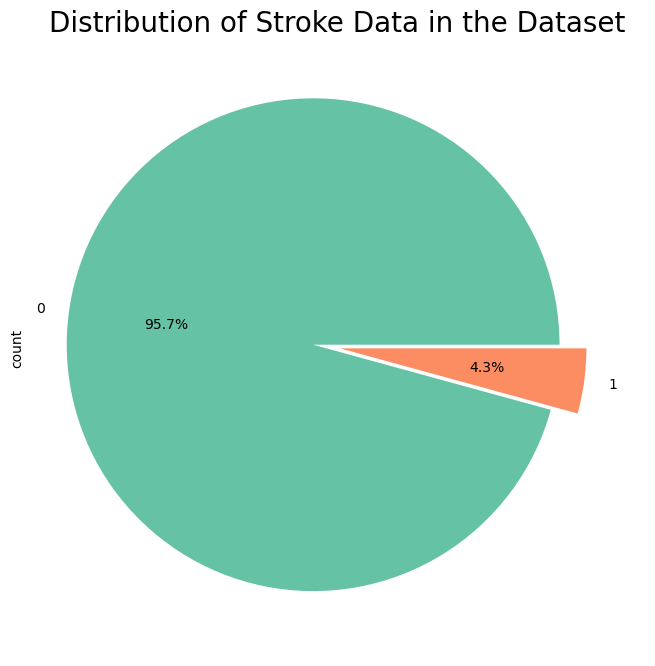

In [10]:
df.stroke.value_counts().plot.pie(figsize=(12,8), explode=(0.1, 0.01), autopct="%1.1f%%", colors=sns.color_palette('Set2'))
plt.title('Distribution of Stroke Data in the Dataset',fontsize=20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


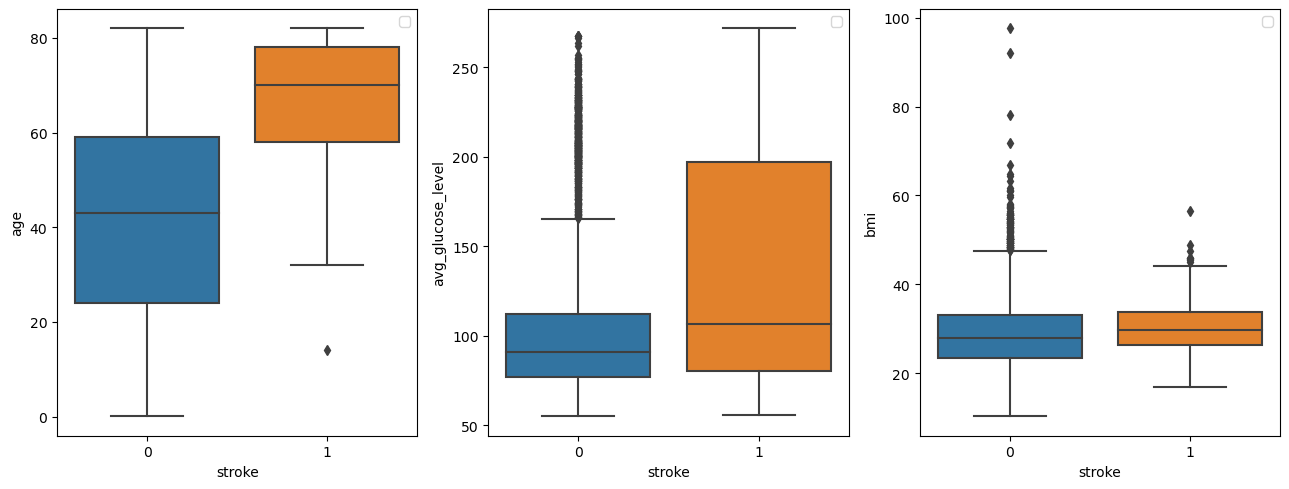

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))  # define the figure and subplots
axes = axes.ravel()
cols = visu.columns  

for col, ax in zip(cols, axes):
    sns.boxplot(data=df, x='stroke', y=col, ax=ax)
    ax.legend()
    
#fig.delaxes(axes[3])  # delete the empty subplot
fig.tight_layout()
plt.show()

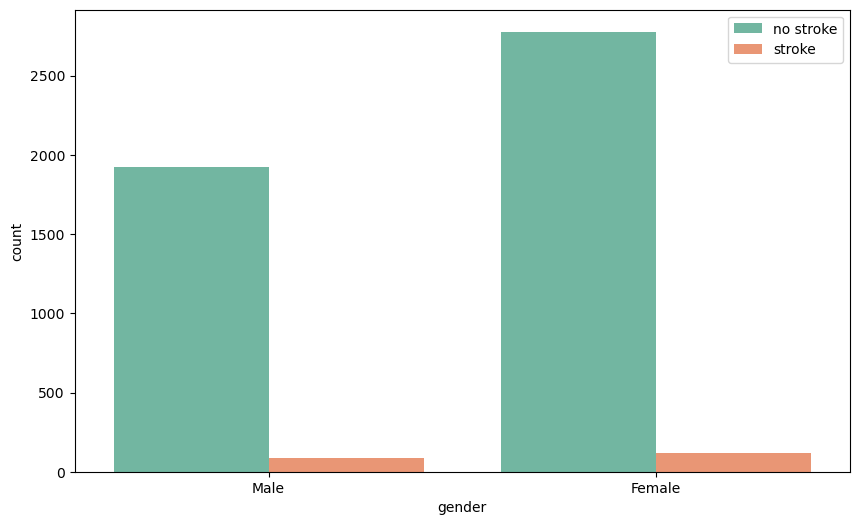

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="hypertension", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

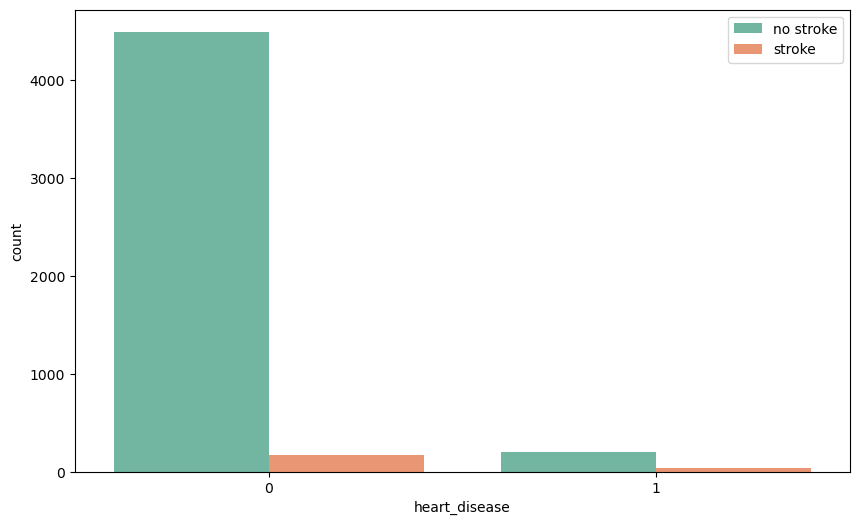

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x="heart_disease", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

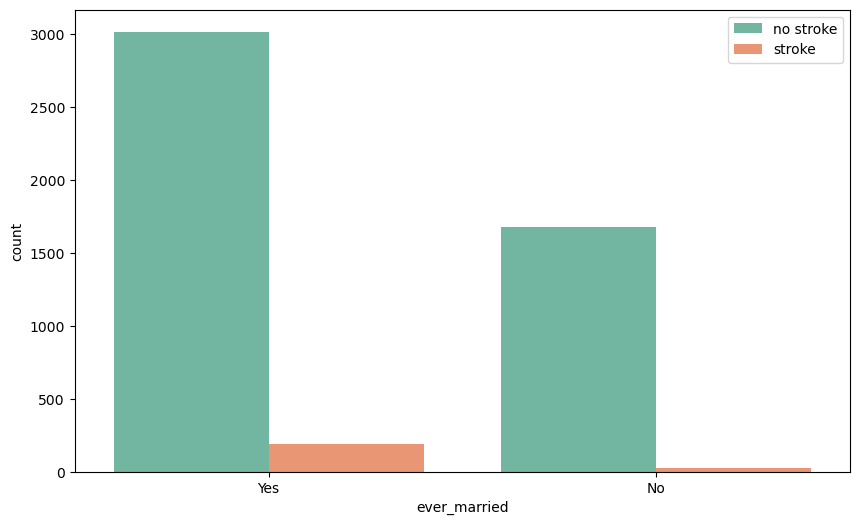

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

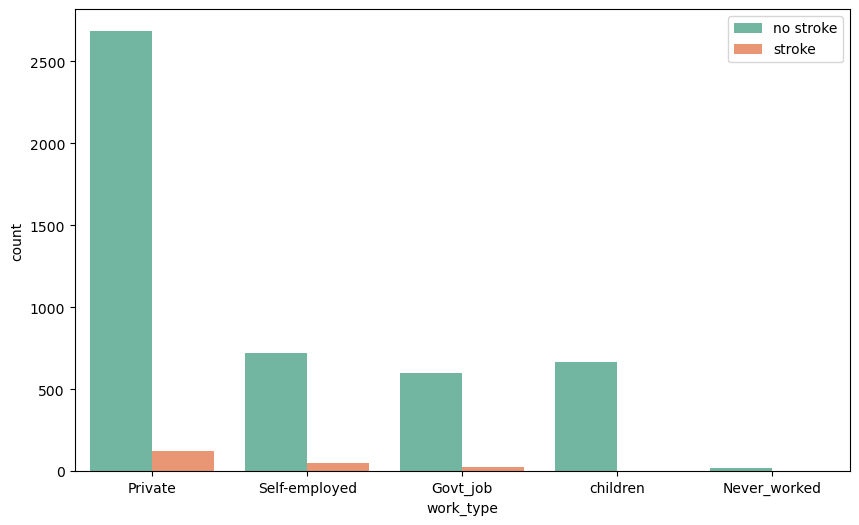

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

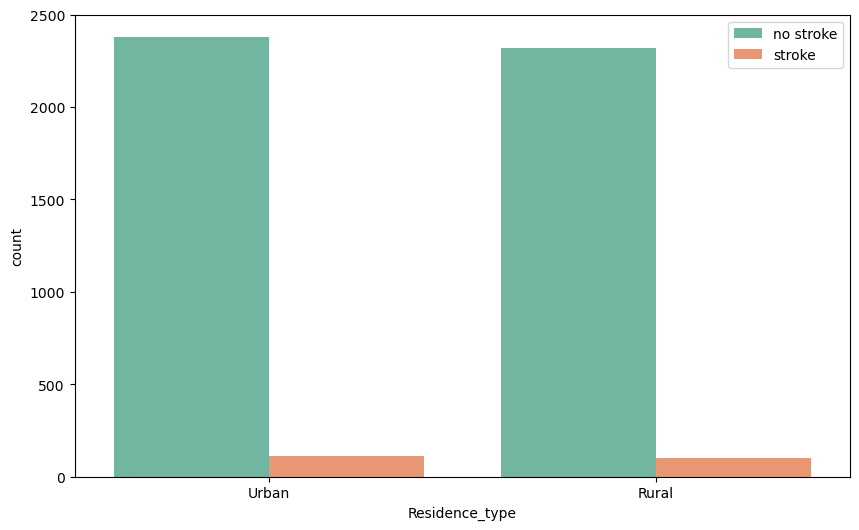

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

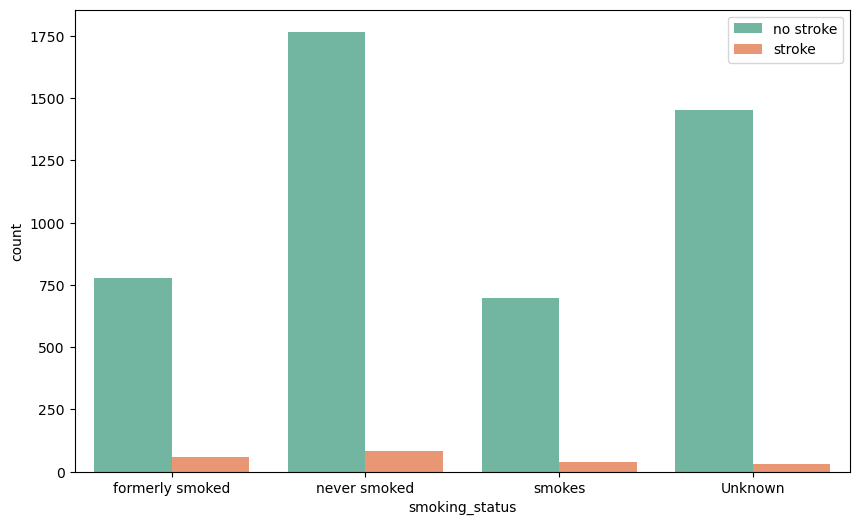

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='Set2',hue='stroke')
plt.legend(['no stroke','stroke'])

In [19]:
kategorik_sutunlar = ['gender', 'ever_married', 'Residence_type']

label_encoders = {}

for sutun in kategorik_sutunlar:
    encoder = LabelEncoder()
    df[sutun] = encoder.fit_transform(df[sutun])
    label_encoders[sutun] = encoder

df.head()

gender   age  hypertension  heart_disease  ever_married      work_type  \
0       1  67.0             0              1             1        Private   
1       1  80.0             0              1             1        Private   
2       0  49.0             0              0             1        Private   
3       0  79.0             1              0             1  Self-employed   
4       1  81.0             0              0             1        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0               1             228.69  36.6  formerly smoked       1  
1               0             105.92  32.5     never smoked       1  
2               1             171.23  34.4           smokes       1  
3               0             174.12  24.0     never smoked       1  
4               1             186.21  29.0  formerly smoked       1

In [20]:
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})

In [21]:
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [22]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          0   
1       1  80.0             0              1             1          0   
2       0  49.0             0              0             1          0   
3       0  79.0             1              0             1          1   
4       1  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               0       1  
1               0             105.92  32.5               1       1  
2               1             171.23  34.4               2       1  
3               0             174.12  24.0               1       1  
4               1             186.21  29.0               0       1

<Axes: >

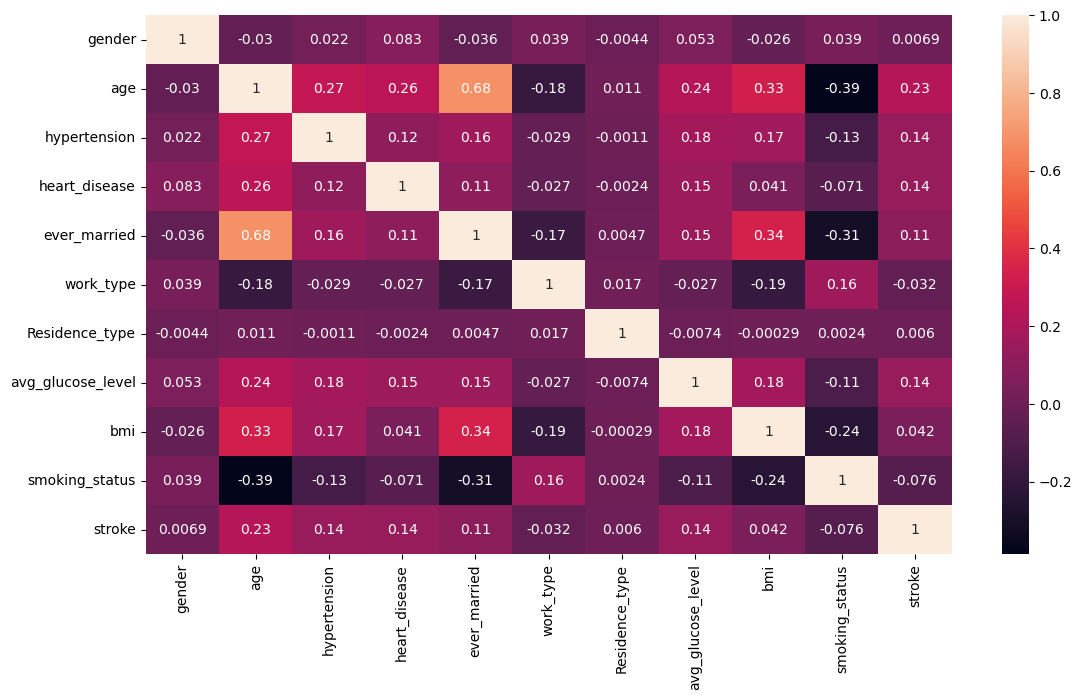

In [23]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True)

In [24]:
X = df.drop('stroke', axis='columns')
y = df.stroke

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [27]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y_encoded)

In [28]:
y_resampled.shape

(9398,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [30]:
X_train.shape

(7518, 10)

In [31]:
X_test.shape

(1880, 10)

In [32]:
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted,pos_label=1)
    RecallScore =   recall_score(actual,predicted,pos_label=1)
    F1_score =     f1_score(actual,predicted,pos_label=1)
    Accuracy =    accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,'F1_Score':F1_score,'Accuracy':Accuracy}

    return result

dict_list = []
models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine': SVC(),
         'Random Forest': RandomForestClassifier(),
         'GaussianNB': GaussianNB(),
         'Gradient Boosting': GradientBoostingClassifier(),
         'XGBoost': XGBClassifier()
         }

for model_name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    evalutaion_result = evaluate(y_test, y_pred, model_name)
    dict_list.append(evalutaion_result)

results_df =pd.DataFrame(dict_list)

In [33]:
results_df.sort_values(by='F1_Score',ascending=False,inplace=True,ignore_index=True)
results_df

Model  Precision_Score  Recall_Score  F1_Score  Accuracy
0           Random Forest         0.986359      1.000000  0.993133  0.993085
1           Decision Tree         0.949495      1.000000  0.974093  0.973404
2                 XGBoost         0.948537      1.000000  0.973589  0.972872
3     K-Nearest Neighbors         0.893536      1.000000  0.943775  0.940426
4       Gradient Boosting         0.805742      0.895745  0.848363  0.839894
5  Support Vector Machine         0.802567      0.864894  0.832565  0.826064
6     Logistic Regression         0.746479      0.789362  0.767322  0.760638
7              GaussianNB         0.762009      0.742553  0.752155  0.755319

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       940
           1       0.98      1.00      0.99       940

    accuracy                           0.99      1880
   macro avg       0.99      0.99      0.99      1880
weighted avg       0.99      0.99      0.99      1880



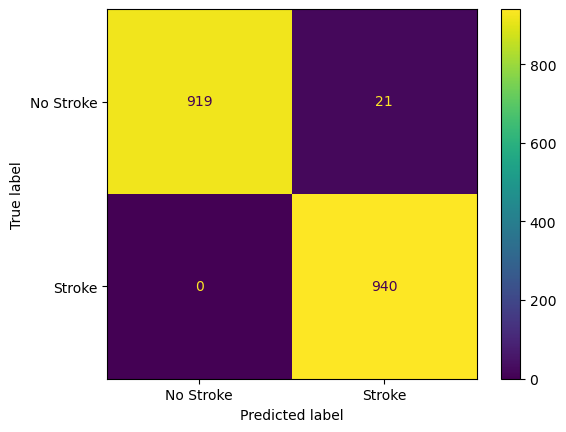

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()

In [35]:
import joblib
joblib.dump(model, 'model_joblib')

['model_joblib']